# 1. Описание набора данных
Данные описывают стоимость жилья в субъектах Российской Федерации.

*Набор данных включает следующие признаки:*

* № - признак - описание


* 0 - date - дата
* 1 - price - цена
* 2 - level - этаж
* 3 - levels - общее количество этажей
* 4 - rooms - количество комнат (1, 2, и т.д., '-1' - студия )
* 5 - area - общая площадь
* 6 - kitchen_area - площадь кухни
* 7 - geo_lat - широта
* 8 - geo_lon - долгота
* 9 - building_type - тип дома
    * 0: 'Неизвестно',
    * 1: 'Другое',
    * 2: 'Панельный',
    * 3: 'Монолитный',
    * 4: 'Кирпичный',
    * 5: 'Блочный',
    * 6: 'Деревянный'  
* 10 - object_type - тип квартиры 0: 'Вторичка', 2: 'Новострой'  
* 11 - postal_code - почтовый индекс  
* 12 - street_id - номер улицы  
* 13 - id_region - регион  
* 14 - house_id - номер дома  
* 15 - price_per_metr - цена за метр

# 2. Загрузите этот набор данных в DataFrame, проведите стандартный первичный обзор данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

На первом этапе нам важно посмотреть, что за данные у нас на руках: какие столбцы, какие типы данных, какие они принимают значения.

In [2]:
# Загрузим набор данных
data = pd.read_csv("/content/input_data.csv",
                   sep = ";")

In [3]:
# Выведем первые строки
data.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,2021-01-01,2451300.0,15.0,31.0,1.0,30.3,0.0,56.780112,60.699355,0.0,2.0,620000.0,NaN,66.0,1632918.0
1,2021-01-01,1450000.0,5.0,5.0,1.0,33.0,6.0,44.608154,40.138381,0.0,0.0,385000.0,NaN,1.0,NaN
2,2021-01-01,10700000.0,4.0,13.0,3.0,85.0,12.0,55.540060,37.725112,3.0,0.0,142701.0,242543.0,50.0,681306.0
3,2021-01-01,3100000.0,3.0,5.0,3.0,82.0,9.0,44.608154,40.138381,0.0,0.0,385000.0,NaN,1.0,NaN
4,2021-01-01,2500000.0,2.0,3.0,1.0,30.0,9.0,44.738685,37.713668,3.0,2.0,353960.0,439378.0,23.0,1730985.0


Так как выбранный набор данных достаточно велик, проведем анализ для одного субъекта РФ - 70  регион , г. Томск

In [4]:
tomsk_data = data[data.id_region == 70]
tomsk_data

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
218,2021-01-01,3500000.0,1.0,9.0,3.0,45.0,0.0,56.484189,85.022433,4.0,0.0,634021.0,578645.0,70.0,2379379.0
230,2021-01-01,1430000.0,1.0,9.0,1.0,28.0,0.0,56.585086,84.920511,4.0,0.0,636019.0,NaN,70.0,NaN
527,2021-01-01,2800000.0,1.0,2.0,2.0,38.0,0.0,56.480324,85.032343,5.0,0.0,634021.0,530181.0,70.0,1585787.0
576,2021-01-01,4000000.0,7.0,17.0,3.0,59.0,0.0,56.520787,84.933380,2.0,0.0,634024.0,460950.0,70.0,1329234.0
753,2021-01-01,2900000.0,7.0,9.0,2.0,39.0,0.0,56.473295,85.047726,4.0,0.0,634055.0,355821.0,70.0,1967209.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424218,2021-01-26,5000000.0,1.0,9.0,2.0,54.0,0.0,54.941922,73.396536,0.0,0.0,644005.0,NaN,70.0,NaN
424226,2021-01-26,3850000.0,9.0,10.0,2.0,53.4,0.0,56.498068,85.032773,2.0,0.0,634062.0,124965.0,70.0,1264321.0
424227,2021-01-26,3200000.0,4.0,9.0,-1.0,37.3,7.0,56.466837,84.906281,0.0,0.0,634512.0,NaN,70.0,NaN
424273,2021-01-26,2200000.0,2.0,3.0,3.0,70.0,7.0,56.600386,84.859937,5.0,0.0,636035.0,NaN,70.0,NaN


In [5]:
# Посмотрим сводную информацию
tomsk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3918 entries, 218 to 424373
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3918 non-null   object 
 1   price          3918 non-null   float64
 2   level          3918 non-null   float64
 3   levels         3918 non-null   float64
 4   rooms          3918 non-null   float64
 5   area           3918 non-null   float64
 6   kitchen_area   3918 non-null   float64
 7   geo_lat        3918 non-null   float64
 8   geo_lon        3918 non-null   float64
 9   building_type  3918 non-null   float64
 10  object_type    3918 non-null   float64
 11  postal_code    3904 non-null   float64
 12  street_id      1463 non-null   float64
 13  id_region      3918 non-null   float64
 14  house_id       1478 non-null   float64
dtypes: float64(14), object(1)
memory usage: 489.8+ KB


Исходя из полученной информации, видим, что *численные типы данных* в выбранном датасете преобладают

In [6]:
# проверим наличие пропущенных значений в столбцах
tomsk_data.isna().sum()

date                0
price               0
level               0
levels              0
rooms               0
area                0
kitchen_area        0
geo_lat             0
geo_lon             0
building_type       0
object_type         0
postal_code        14
street_id        2455
id_region           0
house_id         2440
dtype: int64

In [7]:
# так как в признаках "postal_code", "street_id", "house_id" много пропусков, и они
# не имеют смысловую нагрузку для анализа, удалим данные признаки
tomsk_data.drop(columns = ['date', 'postal_code', 'street_id', 'house_id'], inplace = True)

<ipython-input-7-d3bf835fbb83>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tomsk_data.drop(columns = ['date', 'postal_code', 'street_id', 'house_id'], inplace = True)


In [8]:
# проверим наличие дубликатов
tomsk_data.duplicated().sum()

306

In [9]:
# Для дальнейшего анализа, добавим признак "средняя цена за квадратный метр" в наш датафрейм
tomsk_data['price_per_metr'] = tomsk_data.price/tomsk_data.area

<ipython-input-9-420ca4418160>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tomsk_data['price_per_metr'] = tomsk_data.price/tomsk_data.area


In [10]:
#для удобства просмотра приведем признак "price_per_metr" цена за 1 кв.м к типу int
tomsk_data['price_per_metr'] = tomsk_data['price_per_metr'].astype('int')

<ipython-input-10-88fbfb1c5f62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tomsk_data['price_per_metr'] = tomsk_data['price_per_metr'].astype('int')


In [11]:
# отобразим описательные статистические данные
tomsk_data.describe()

,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,id_region,price_per_metr
count,3.918000e+03,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.0,3.918000e+03
mean,4.255052e+06,4.323379,7.857070,1.774119,47.690720,-4.815748,56.438958,83.935418,1.613068,0.028076,70.0,8.483030e+04
std,6.867743e+07,3.287799,4.184535,1.021982,24.904155,26.105729,0.738947,3.922979,1.851068,0.235323,0.0,1.163462e+06
min,1.900000e+05,1.000000,0.000000,-1.000000,8.800000,-100.000000,44.006459,20.549519,0.000000,0.000000,70.0,7.633000e+03
25%,2.000000e+06,2.000000,5.000000,1.000000,32.000000,0.000000,56.468108,84.945680,0.000000,0.000000,70.0,5.357100e+04
50%,2.800000e+06,3.000000,8.000000,2.000000,44.000000,0.000000,56.493300,84.977230,0.000000,0.000000,70.0,6.805500e+04
75%,3.899000e+06,6.000000,10.000000,2.000000,60.000000,0.000000,56.516410,85.012283,4.000000,0.000000,70.0,7.907400e+04
max,4.300000e+09,19.000000,20.000000,6.000000,310.400000,42.000000,62.055632,129.727669,6.000000,2.000000,70.0,7.288136e+07


**По результатам стандартного первичного обзора данных  можно увидеть, что имеются пропущенные значения в строках, дубликаты и выбросы(например в колонке средней цены за квадратный метр)**

# 3.   Проведите предподготовку данных

In [12]:
# заменим "отсутвующие данные" на "NaN"
tomsk_data = tomsk_data.replace(' ', np.nan)

In [13]:
# Удалим пропущенные значения и проверим результат:
tomsk_data = tomsk_data.dropna()
tomsk_data.isna().sum()

price             0
level             0
levels            0
rooms             0
area              0
kitchen_area      0
geo_lat           0
geo_lon           0
building_type     0
object_type       0
id_region         0
price_per_metr    0
dtype: int64

In [14]:
# Удалим дубликаты и проверим результат:
tomsk_data = tomsk_data.drop_duplicates().reset_index(drop=True)
tomsk_data.duplicated().sum()

0

In [15]:
# удаляем квартиры цены которые имеют выбросы (цена за квадратный метр больше 1 000 000 руб.)
tomsk_data_clean = tomsk_data[tomsk_data['price_per_metr'] < 1000000]

In [16]:
# удаляем квартиры с этажами ниже 1
tomsk_data_clean = tomsk_data_clean[tomsk_data_clean['level'] > 1]

In [17]:
# удаляем квартиры с плоадью кухонь меньше 0
tomsk_data_clean = tomsk_data_clean[tomsk_data_clean['kitchen_area'] > 0]

In [18]:
# удаляем квартиры с количеством комнат меньше 0
tomsk_data_clean = tomsk_data_clean[tomsk_data_clean['rooms'] > -1]

In [19]:
tomsk_data_clean.describe()

,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,id_region,price_per_metr
count,6.930000e+02,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.0,693.000000
mean,3.504664e+06,5.189033,8.086580,2.067821,54.498961,8.833579,56.496074,83.816946,1.187590,0.051948,70.0,64251.124098
std,1.913784e+06,3.087883,3.735242,0.916935,21.483250,3.548311,0.784136,3.394053,1.663799,0.318345,0.0,20369.230177
min,3.800000e+05,2.000000,0.000000,1.000000,12.000000,2.000000,54.884695,73.271940,0.000000,0.000000,70.0,7647.000000
25%,2.350000e+06,3.000000,5.000000,1.000000,38.400000,6.400000,56.474690,84.906281,0.000000,0.000000,70.0,50604.000000
50%,3.000000e+06,4.000000,9.000000,2.000000,50.400000,8.000000,56.502669,84.970926,0.000000,0.000000,70.0,67018.000000
75%,4.400000e+06,7.000000,10.000000,3.000000,64.200000,10.000000,56.524120,85.009620,2.000000,0.000000,70.0,77941.000000
max,1.600000e+07,17.000000,20.000000,5.000000,195.900000,42.000000,60.740555,86.754556,6.000000,2.000000,70.0,133458.000000


<Axes: >

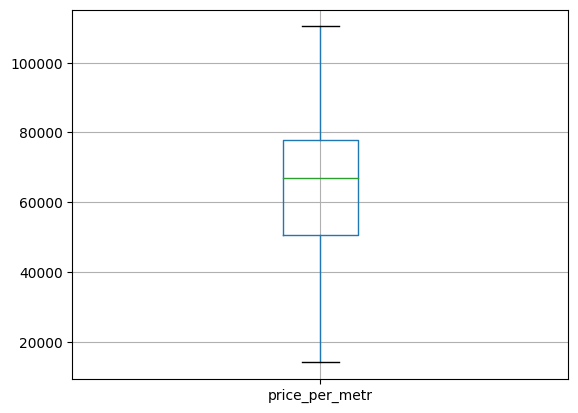

In [20]:
# Очистим от выбросов колонку средней цены за метр и посмотрим на диаграмме размаха
Q1 =  tomsk_data_clean['price_per_metr'].quantile(0.25)
Q3 = tomsk_data_clean['price_per_metr'].quantile(0.75)
IQR = Q3 - Q1
tomsk_data_clean = tomsk_data_clean[(tomsk_data_clean['price_per_metr'] > (Q1-1.5*IQR)) & (tomsk_data_clean['price_per_metr'] < (Q3+1.5*IQR))]
tomsk_data_clean.boxplot(column="price_per_metr")

# 4. Проведите обзорный анализ данных

## Построим гистограмму

Text(0.0, 1.0, 'Распределение типов квартир')

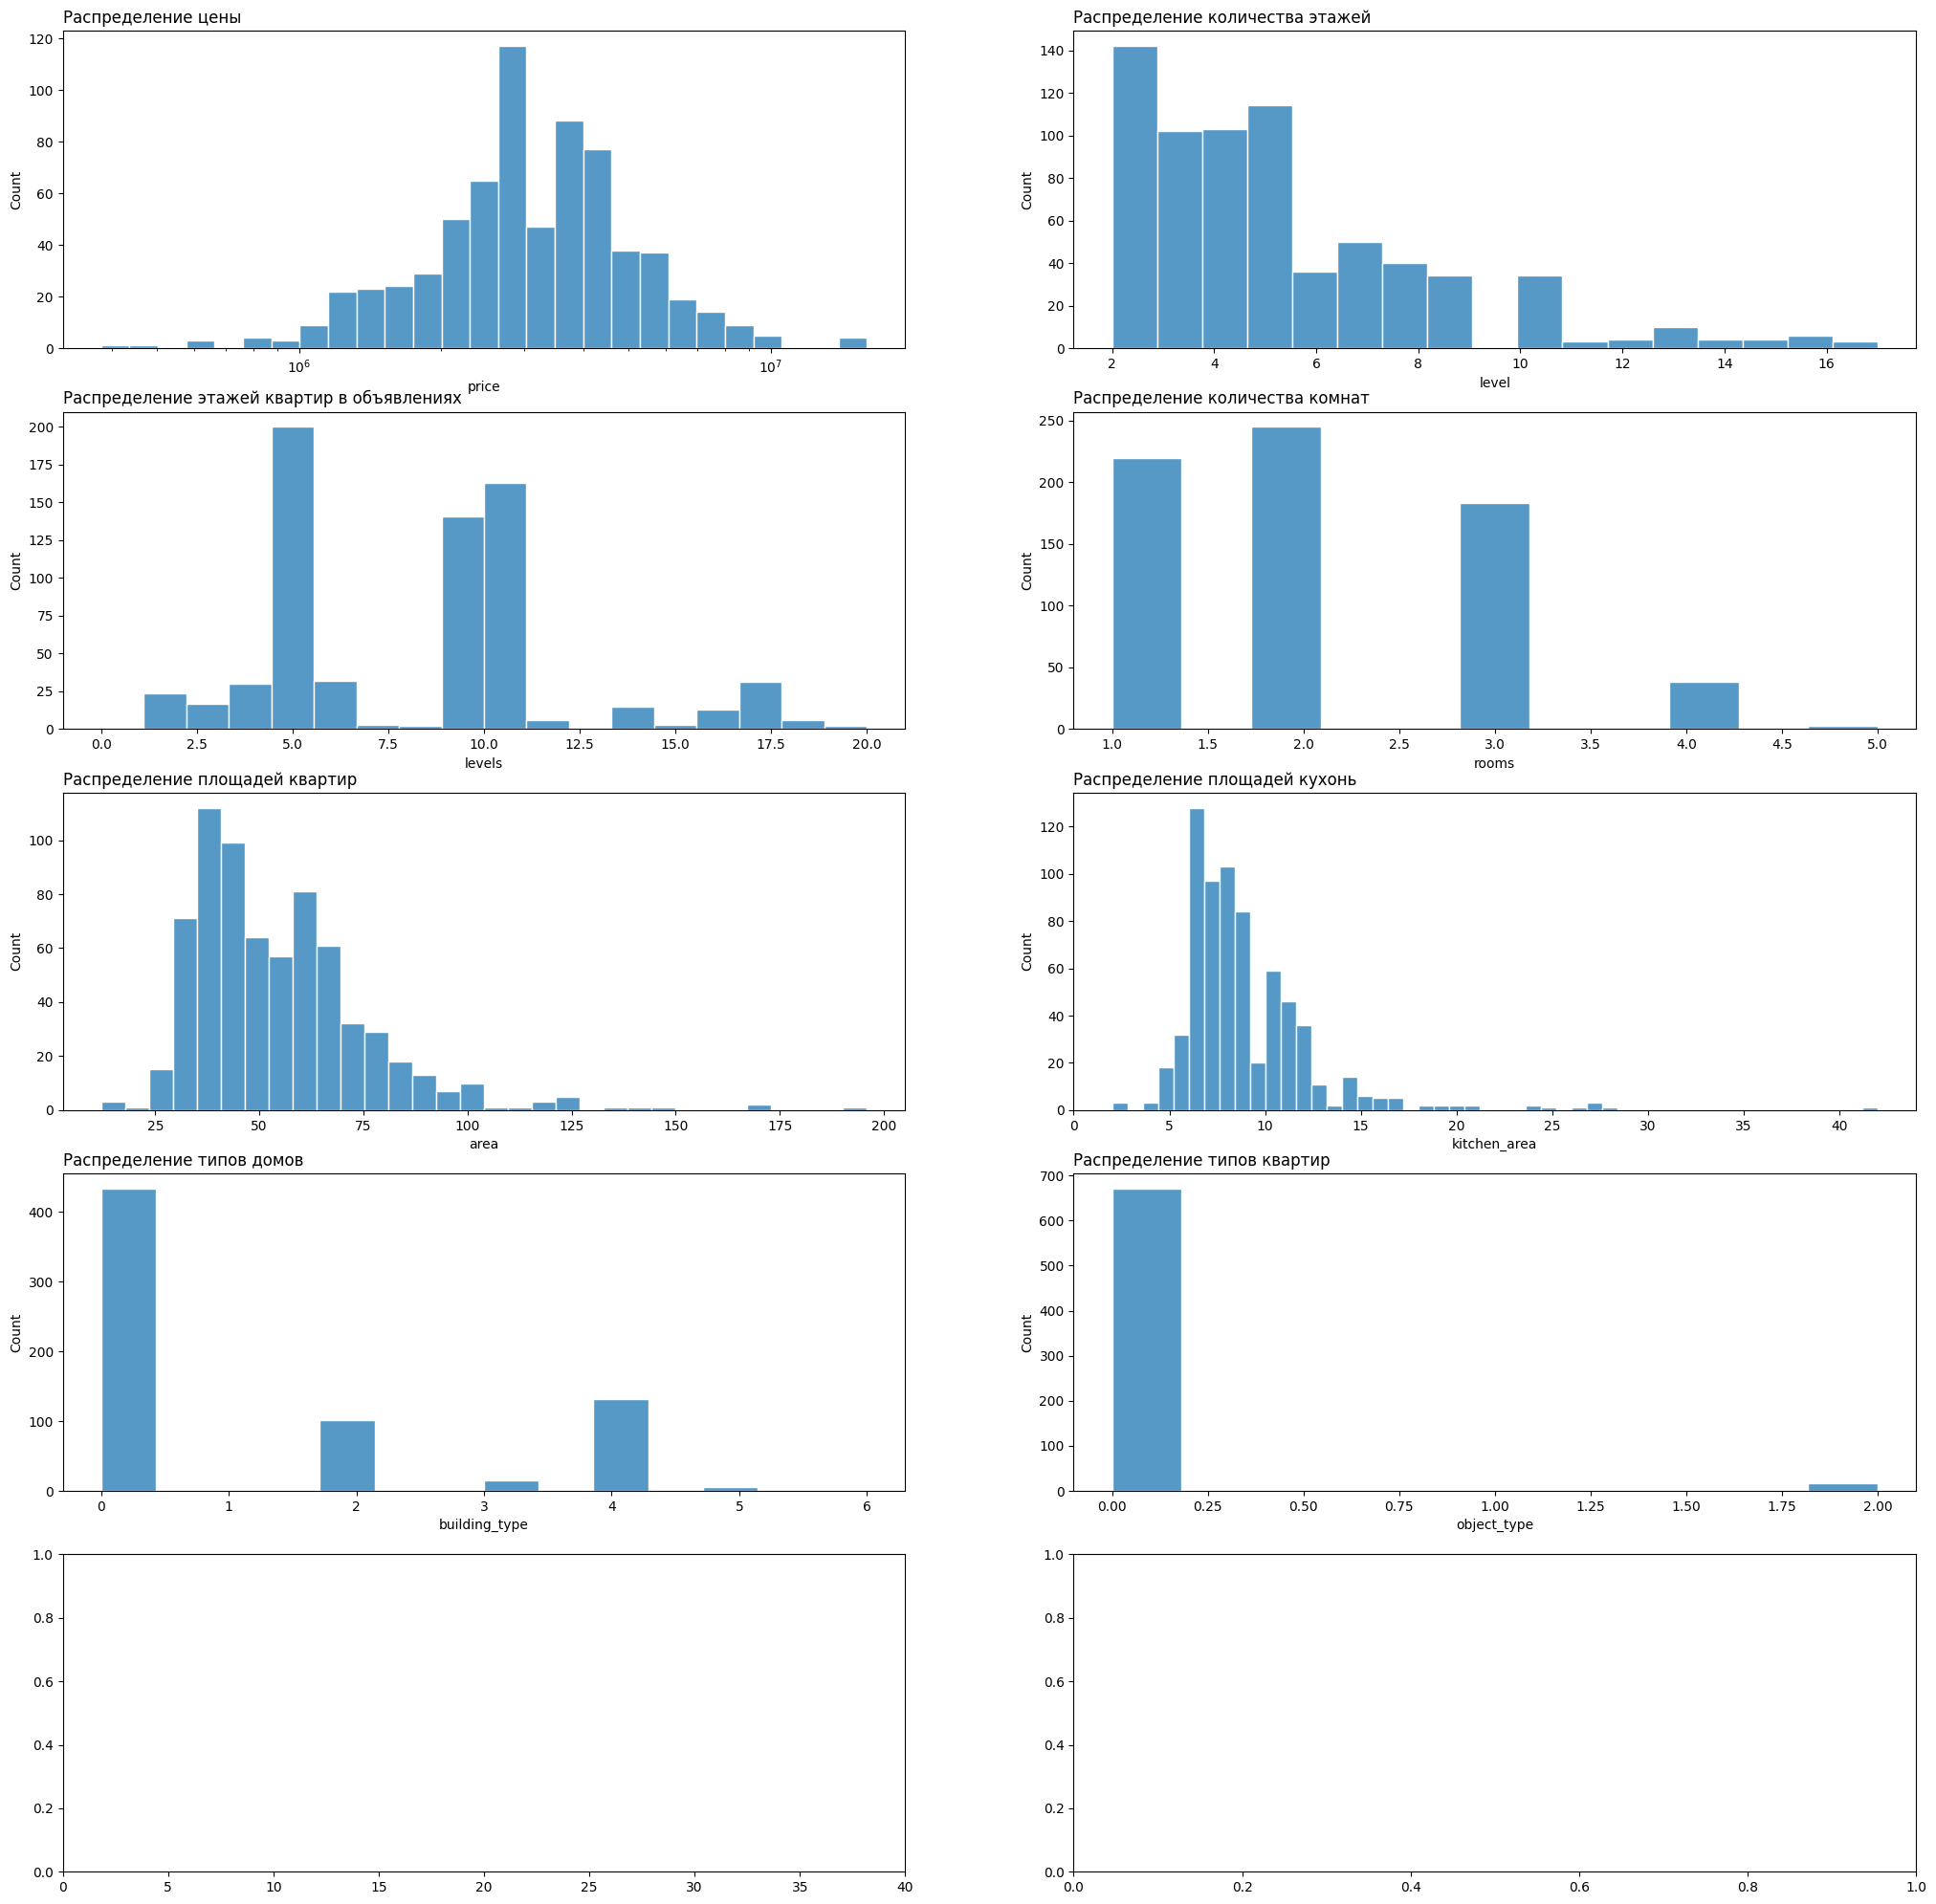

In [21]:
import seaborn as sns
fig, axes = plt.subplots(5, 2, figsize = (25, 25))
sns.set()

sns.histplot(data = tomsk_data_clean.price, ax = axes[0, 0], log_scale=True)
axes[0, 0].set_title('Распределение цены', loc = 'left')


sns.histplot(data = tomsk_data_clean.level, ax = axes[0, 1])
axes[0, 1].set_title('Распределение количества этажей', loc = 'left')

sns.histplot(data = tomsk_data_clean.levels, ax = axes[1, 0])
axes[1, 0].set_title('Распределение этажей квартир в объявлениях', loc = 'left')

sns.histplot(data = tomsk_data_clean.rooms, ax = axes[1, 1])
axes[1, 1].set_title('Распределение количества комнат', loc = 'left')

sns.histplot(data = tomsk_data_clean.area, ax = axes[2, 0])
axes[2, 0].set_title('Распределение площадей квартир', loc = 'left')
axes[4, 0].set_xlim([0, 200])

sns.histplot(data = tomsk_data_clean.kitchen_area, ax = axes[2, 1])
axes[2, 1].set_title('Распределение площадей кухонь', loc = 'left')
axes[4, 0].set_xlim([0, 40])

sns.histplot(data = tomsk_data_clean.building_type, ax = axes[3, 0])
axes[3, 0].set_title('Распределение типов домов', loc = 'left')

sns.histplot(data = tomsk_data_clean.object_type, ax = axes[3, 1])
axes[3, 1].set_title('Распределение типов квартир', loc = 'left')

**Построим круговые диаграммы для анализа**

In [22]:
# чтоб исходные обработанные данные остались неизменны, скопируем данные в новый дата фреймы
# с которым будем работать для построения круговой диаграммы
t_labels = tomsk_data_clean.copy()

In [23]:
## изменим в новом дата фрейм данные в признаках rooms, building_type, object_type на построения круговой диаграммы
t_labels.object_type = t_labels.object_type.map({0: 'Вторичка', 2: 'Новостройка'})
t_labels.building_type = t_labels.building_type.map({0: 'Неизвестно', 1: 'Другое', 2: 'Панельный', 3: 'Монолитный', 4: 'Кирпичный', 5: 'Блочный', 6: 'Деревянный'})
t_labels.rooms = t_labels.rooms.map({-1: 'Студия', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7'})

In [24]:
# функции для отображения значений на долях на круговой диаграмме
def func(pct, allvalues):
    if pct > 1:
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d})".format(pct, absolute)
    else:
        return ''

def func1(pct, allvalues):
    if pct > 3:
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d})".format(pct, absolute)
    else:
        return ''

def labels_func(data, q):
    data = data / np.sum(data)
    return list(data[data > q].keys()) + ['' for i in data[data <= q].keys()]

Text(0.0, 1.0, 'Тип здания')

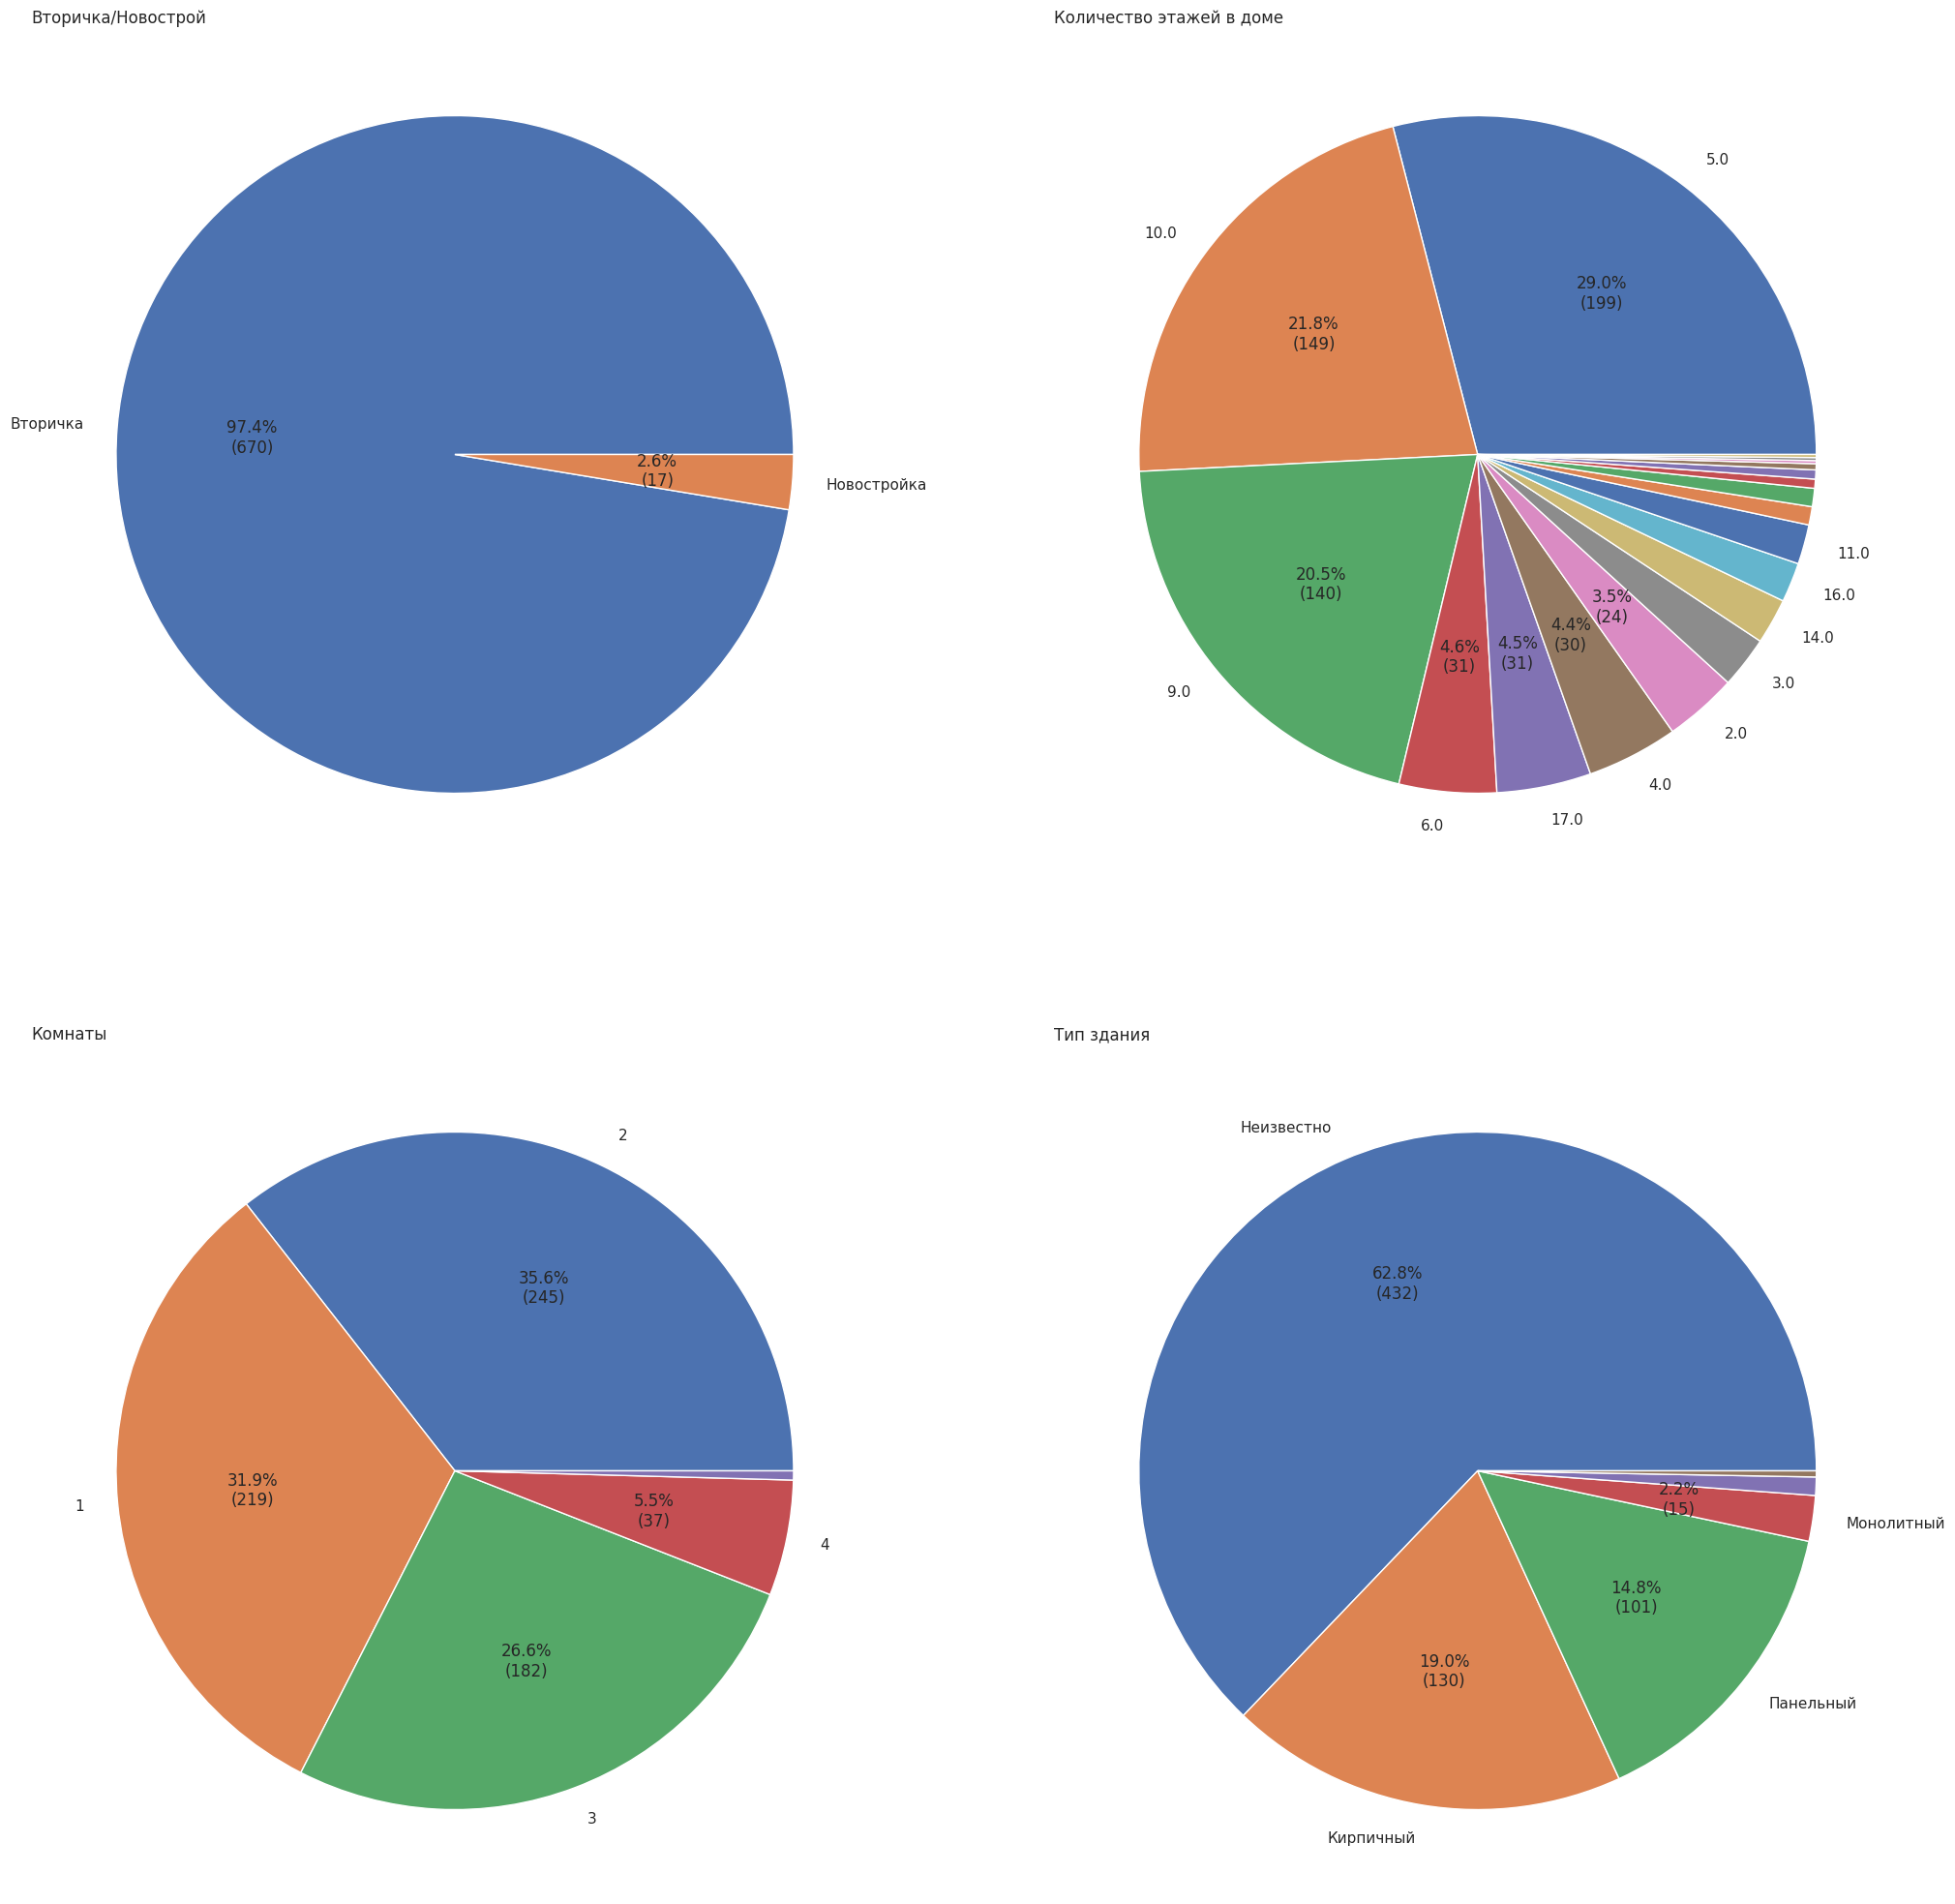

In [25]:
fig, axes = plt.subplots(2, 2, figsize = (25, 25))

axes[0, 0].pie(t_labels.object_type.value_counts(), labels = t_labels.object_type.value_counts().keys(), autopct = lambda pct: func(pct, t_labels.object_type.value_counts()))
axes[0, 0].set_title('Вторичка/Новострой', loc = 'left')

labels = labels_func(t_labels.levels.value_counts(), 0.01)
axes[0, 1].pie(t_labels.levels.value_counts(), labels = labels, autopct = lambda pct: func1(pct, t_labels.object_type.value_counts()))
axes[0, 1].set_title('Количество этажей в доме', loc = 'left')

labels = labels_func(t_labels.rooms.value_counts(), 0.01)
axes[1, 0].pie(t_labels.rooms.value_counts(), labels = labels, autopct = lambda pct: func(pct, t_labels.object_type.value_counts()))
axes[1, 0].set_title('Комнаты', loc = 'left')

labels = labels_func(t_labels.building_type.value_counts(), 0.01)
axes[1, 1].pie(t_labels.building_type.value_counts(), labels = labels, autopct = lambda pct: func(pct, t_labels.object_type.value_counts()))
axes[1, 1].set_title('Тип здания', loc = 'left')

Давайте посмотрим зависимость цены за квадратный метр от типа дома. Назначим тип дома- как категориальная переменная.

<Axes: xlabel='building_type', ylabel='price_per_metr'>

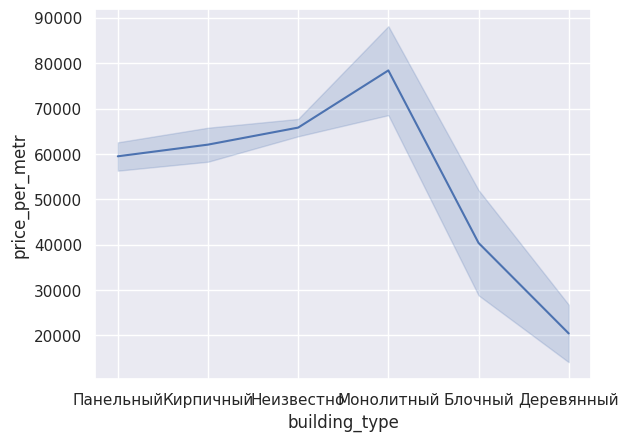

In [28]:
sns.lineplot(data=t_labels, x="building_type", y="price_per_metr")

Исходя из графика видно, что самая высокая цена за квадратный метр в монолитном типе дома

<Axes: xlabel='level', ylabel='price_per_metr'>

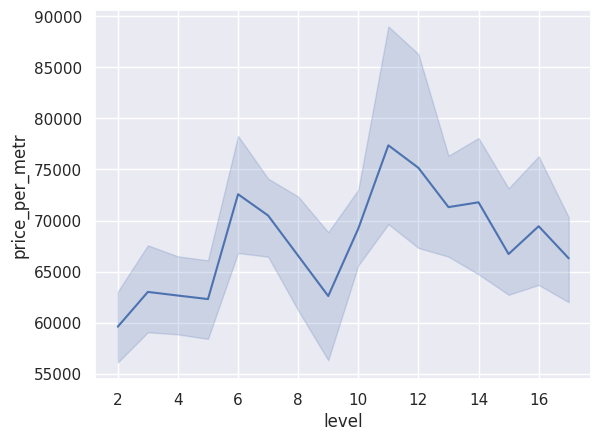

In [34]:
sns.lineplot(data=t_labels, x="level", y="price_per_metr")

Исходя из зависимости выше видно, что самый дорогой квадратный метр на 11 этаже

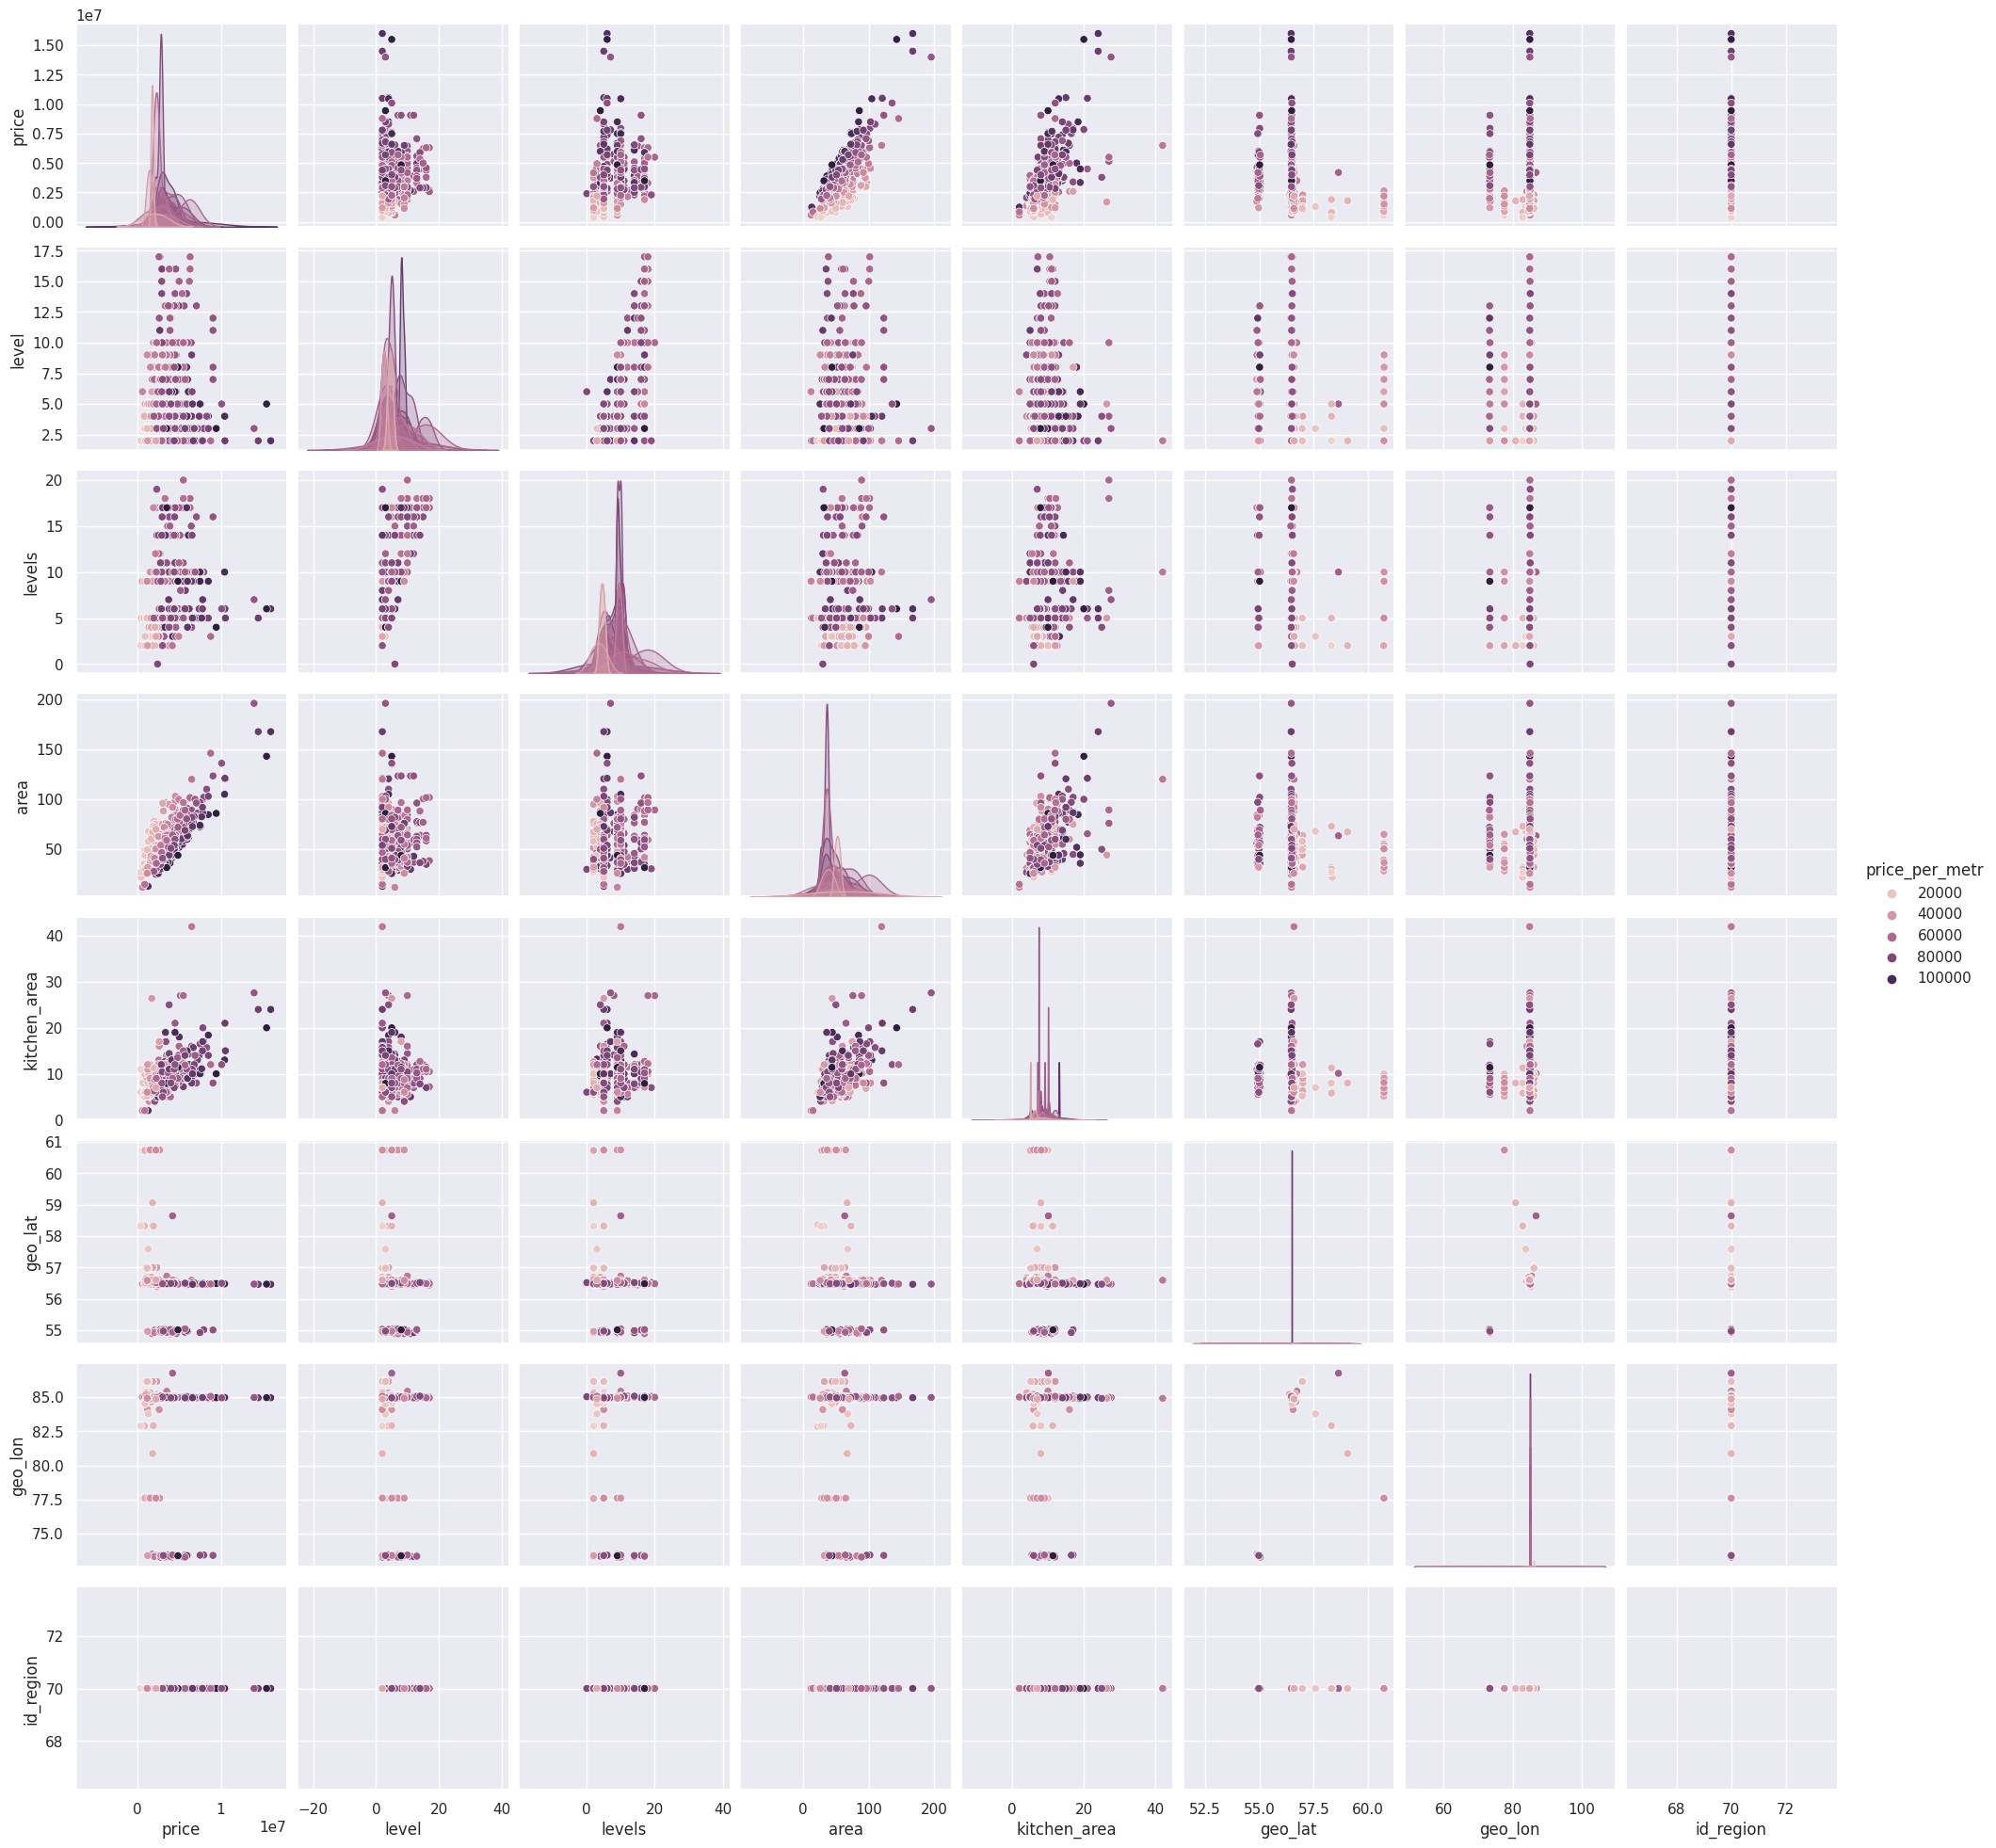

In [33]:
sns.pairplot(t_labels, hue="price_per_metr")

# Выводы

In [ ]:
tomsk_data.shape

(61605, 12)

В результате работы был обработан и проанализирован адатасет размером в(61605, 12).

Набор данных для анализа оказался достаточно качественным, так как критерии были для сбора датасета были выбраны логичны и между собой корреллировались, а также количество выбросов в каждом критерии было не столько велико, что могло бы помешать анализу.

По ходу работы, большую часть времени, конечно же, заняла обработка данных, поиск и удаление выбросов, нежели чем сама аналитика.

В результате работы мы узнали среднюю стоимость квадратного метра жилья, и вообще общую картину жилья в г. Томск, вряд ли, когда -нибудь эта информация нам пригодится, но все же =)